In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('netflix.csv')

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.shape

(8807, 12)

In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [12]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Task - 1. Is there any Duplicate Record in this dataset ? If yes, then remove the duplicate records.

In [13]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool

In [14]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(8807, 12)

### Observation : No Duplicate Values Present in Dataset

# Task - 2. Is there any Null Value present in any column ? Show with Heat-map.

In [21]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

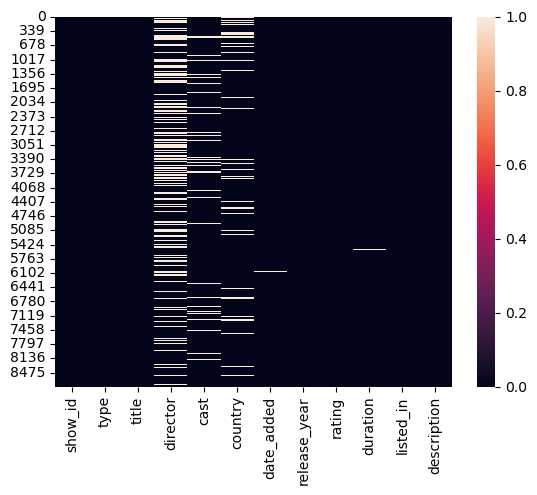

In [22]:
sns.heatmap(df.isnull())

### Q. 1) For 'House of Cards', what is the Show Id and Who is the Director of this show ?

In [102]:
df[df['title']=='House of Cards']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minutes,unit
1059,s1060,TV Show,House of Cards,NaN,"Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"April 14, 2021",2018,TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...,6.0,Seasons


### Q. 2) In which year the highest number of the TV Shows & Movies were released ? Show with Bar Graph.

In [40]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [50]:
df['release_year'].value_counts()

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

<Axes: xlabel='release_year'>

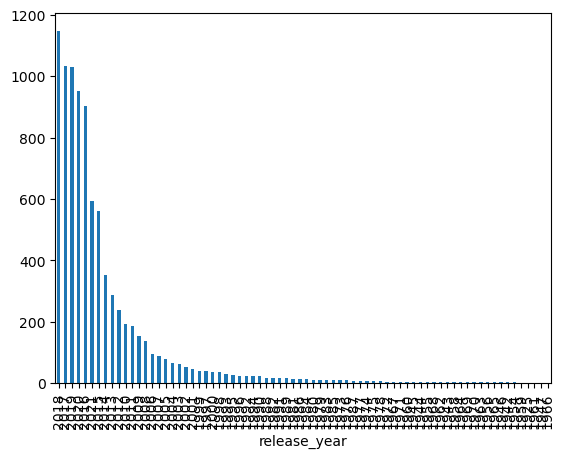

In [54]:
df['release_year'].value_counts().plot(kind='bar')

### Q. 3) How many Movies & TV Shows are in the dataset ? Show with Bar Graph.

In [60]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

<Axes: xlabel='type'>

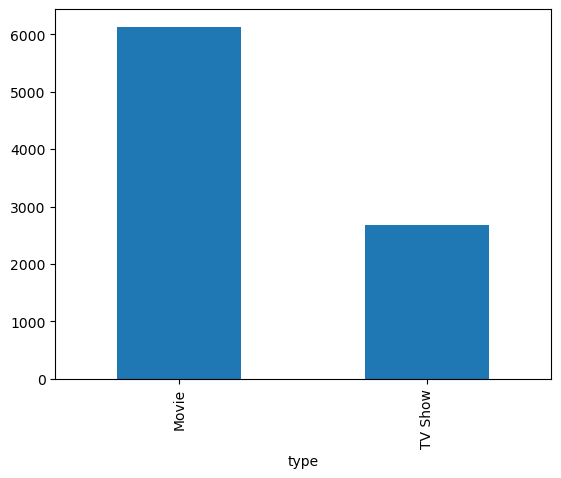

In [61]:
df['type'].value_counts().plot(kind='bar')

### Q. 4) Show all the Movies that were released in year 2000.

In [70]:
df[  (df['type']=='Movie')  &  (df['release_year']==2000)  ]['title']

180                    The Nutty Professor II: The Klumps
350                                         Space Cowboys
359                          The Original Kings of Comedy
566                                      Charlie's Angels
593                                              Snow Day
779                                     Battlefield Earth
952                                  The Whole Nine Yards
3472                          Rugrats in Paris: The Movie
4545               Monty Python: Before the Flying Circus
4723                                                 Fiza
4956                          Phir Bhi Dil Hai Hindustani
5953                               Joseph: King of Dreams
6006                                              28 Days
6147                                      American Psycho
6154    An American Tail: The Treasures of Manhattan I...
6311                                         Billy Elliot
6437                                         Center Stage
6440          

### Q. 5) Show only the Titles of all TV Shows that were released in India only.

In [77]:
df[  (df['country']=='India')  & (df['type']=='TV Show')  ]['title']

4                             Kota Factory
39                            Chhota Bheem
50                           Dharmakshetra
66           Raja Rasoi Aur Anya Kahaniyan
69          Stories by Rabindranath Tagore
                       ...                
8173                             Thackeray
8235                           The Calling
8321    The Golden Years with Javed Akhtar
8349                The House That Made Me
8775                       Yeh Meri Family
Name: title, Length: 79, dtype: object

In [18]:
import pandas as pd
df=pd.read_csv('netflix.csv')

### Q. 6) Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?

In [17]:
df['director'].value_counts().head(10)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64

### Q. 7) Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".

In [24]:
df[(df['type']=='Movie') & (df['listed_in']=='Comedies') | (df['country']=='United Kingdom')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
32,s33,TV Show,Sex Education,NaN,"Asa Butterfield, Gillian Anderson, Ncuti Gatwa...",United Kingdom,"September 17, 2021",2020,TV-MA,3 Seasons,"British TV Shows, International TV Shows, TV C...",Insecure Otis has all the answers when it come...
65,s66,TV Show,Numberblocks,NaN,"Beth Chalmers, David Holt, Marcel McCalla, Ter...",United Kingdom,"September 15, 2021",2021,TV-Y,6 Seasons,Kids' TV,"In a place called Numberland, math adds up to ..."
72,s73,TV Show,Jack Whitehall: Travels with My Father,NaN,"Jack Whitehall, Michael Whitehall",United Kingdom,"September 14, 2021",2021,TV-MA,5 Seasons,"British TV Shows, Docuseries, International TV...",Jovial comic Jack Whitehall invites his stuffy...
...,...,...,...,...,...,...,...,...,...,...,...,...
8740,s8741,TV Show,Wild Alaska,NaN,Dougray Scott,United Kingdom,"March 31, 2017",2015,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",The natural bounty of Alaska sustains its dive...
8741,s8742,TV Show,Wild Arabia,NaN,Alexander Siddig,United Kingdom,"March 31, 2017",2013,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",The widely varied geology and dramatic landsca...
8744,s8745,Movie,Williams,Morgan Matthews,NaN,United Kingdom,"November 4, 2017",2017,TV-MA,105 min,"Documentaries, International Movies, Sports Mo...",This inspiring documentary charts the birth of...
8758,s8759,TV Show,World's Busiest Cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,"February 1, 2019",2017,TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali..."


### Q. 8) In how many movies/shows, Tom Cruise was cast ?

In [36]:
df_new=df.dropna()
df_new[df_new['cast'].str.contains('Tom Cruise')]['title'].value_counts().sum()

2

### Q. 9) What are the different Ratings defined by Netflix ?

In [39]:
df['rating'].unique()
#df['rating'].nunique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

#### Q. 9.1) How many Movies got the 'TV-14' rating, in Canada ?

In [50]:
df[(df['type']=='Movie') & (df['rating']=='TV-14') & (df['country']=='Canada')].shape[0]

13

#### Q. 9.2) How many TV Shows got the 'TV-MA' rating, after year 2018 ?

In [63]:
df[(df['type']=='TV Show') & (df['rating']=='TV-MA') & (df['release_year']>2018)].shape[0]

623

### Q. 10) What is the maximum duration of a Movie/Show on Netflix ?

In [85]:
#df['duration'].unique()
#df['duration'].dtypes
df[['minutes', 'unit']]=df['duration'].str.split(' ', expand=True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minutes,unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,Season
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,Seasons


In [88]:
df['minutes'] = pd.to_numeric(df['minutes'])
df['minutes'].max()

312.0

### Q. 11) Which individual country has the Highest No. of TV Shows ?

In [94]:
df[df['type']=='TV Show']['country'].value_counts().head(1)

country
United States    760
Name: count, dtype: int64

### Q. 12) How can we sort the dataset by Year ?

In [98]:
df.sort_values(by='release_year', ascending=False)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minutes,unit
693,s694,Movie,Ali & Ratu Ratu Queens,Lucky Kuswandi,"Iqbaal Ramadhan, Nirina Zubir, Asri Welas, Tik...",NaN,"June 17, 2021",2021,TV-14,101 min,"Comedies, Dramas, International Movies","After his father's passing, a teenager sets ou...",101.0,min
781,s782,Movie,Black Holes | The Edge of All We Know,Peter Galison,NaN,NaN,"June 2, 2021",2021,TV-14,99 min,Documentaries,Follow scientists on their quest to understand...,99.0,min
762,s763,Movie,Sweet & Sour,Lee Kae-byeok,"Jang Ki-yong, Chae Soo-bin, Jung Soo-jung",South Korea,"June 4, 2021",2021,TV-14,103 min,"Comedies, International Movies, Romantic Movies",Faced with real-world opportunities and challe...,103.0,min
763,s764,TV Show,Sweet Tooth,NaN,"Nonso Anozie, Christian Convery, Adeel Akhtar,...",United States,"June 4, 2021",2021,TV-14,1 Season,"TV Action & Adventure, TV Dramas, TV Sci-Fi & ...",On a perilous adventure across a post-apocalyp...,1.0,Season
764,s765,Movie,Trippin' with the Kandasamys,Jayan Moodley,"Jailoshini Naidoo, Maeshni Naicker, Madhushan ...",South Africa,"June 4, 2021",2021,TV-14,94 min,"Comedies, International Movies, Romantic Movies","To rekindle their marriages, best friends-turn...",94.0,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,United States,"March 31, 2017",1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...,61.0,min
8763,s8764,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,"March 31, 2017",1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...,45.0,min
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...,18.0,min
7790,s7791,Movie,Prelude to War,Frank Capra,NaN,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...,52.0,min


### Q. 13) Find all the instances where: Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV' 


In [103]:
df[   ( (df['type']=='Movie')  &  (df['listed_in']=='Dramas') )  | ((df['type']=='TV Show') & (df['listed_in']=='Kids TV'))       ]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minutes,unit
112,s113,Movie,Worth,Sara Colangelo,"Michael Keaton, Stanley Tucci, Amy Ryan, Shuno...",NaN,"September 3, 2021",2021,PG-13,119 min,Dramas,"In the wake of the Sept. 11 attacks, a lawyer ...",119.0,min
129,s130,Movie,An Unfinished Life,Lasse Hallström,"Robert Redford, Jennifer Lopez, Morgan Freeman...","Germany, United States","September 1, 2021",2005,PG-13,108 min,Dramas,A grieving widow and her daughter move in with...,108.0,min
142,s143,Movie,Freedom Writers,Richard LaGravenese,"Hilary Swank, Patrick Dempsey, Scott Glenn, Im...","Germany, United States","September 1, 2021",2007,PG-13,124 min,Dramas,While her at-risk students are reading classic...,124.0,min
162,s163,Movie,Marshall,Reginald Hudlin,"Chadwick Boseman, Josh Gad, Kate Hudson, Sterl...","United States, China, Hong Kong","September 1, 2021",2017,PG-13,118 min,Dramas,"This biopic of Thurgood Marshall, the first Bl...",118.0,min
329,s330,Movie,Catch Me If You Can,Steven Spielberg,"Leonardo DiCaprio, Tom Hanks, Christopher Walk...","United States, Canada","August 1, 2021",2002,PG-13,142 min,Dramas,An FBI agent makes it his mission to put cunni...,142.0,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8674,s8675,Movie,Viceroy's House,Gurinder Chadha,"Hugh Bonneville, Gillian Anderson, Manish Daya...","United Kingdom, India, Sweden","December 12, 2017",2017,NR,106 min,Dramas,As viceroy Lord Mountbatten arrives in Delhi t...,106.0,min
8675,s8676,Movie,Victor,Brandon Dickerson,"Patrick Davis, Lisa Vidal, Josh Pence, José Zú...",United States,"July 24, 2017",2015,PG-13,110 min,Dramas,"In 1962 Brooklyn, a Puerto Rican teen who join...",110.0,min
8685,s8686,Movie,VS.,Ed Lilly,"Connor Swindells, Fola Evans-Akingbola, Nichol...",United Kingdom,"June 19, 2019",2018,TV-MA,99 min,Dramas,A young man in foster care finds his voice in ...,99.0,min
8691,s8692,Movie,Wakefield,Robin Swicord,"Bryan Cranston, Jennifer Garner, Jason O'Mara,...",United States,"March 2, 2019",2016,R,109 min,Dramas,An unhappy father and lawyer quits his suburba...,109.0,min
